In [1]:
import os
import random
import cv2
import imutils
import numpy as np
import pickle
from skimage.io import imread, imshow
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from yellowbrick.model_selection import learning_curve
import seaborn as sb
import tensorflow as tf
import matplotlib.pyplot as plt
import preprocessing as pp
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

def save_data(data, path):
    pick_in = open(path, 'wb')
    pickle.dump(data, pick_in)
    pick_in.close()
    

def load_data(path):
    pick_in = open(path, 'rb')
    data = pickle.load(pick_in)
    pick_in.close()
    return data

        
def save_image(directory, img):
    cv2.imwrite(directory, img)


def convert_to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


def edge_detecting(img):
    denoised_image = cv2.Canny(img, img.shape[0], img.shape[1])
    return denoised_image.flatten()


def rotate(img):
    '''angle is going anti-clockwise direction'''
    rand_angle = random.uniform(-15.0, 15.0)
    rotate_img = imutils.rotate(img, rand_angle)
    return rotate_img


def denoising(img):
    '''the higher h will be , the more noise will be removed as well as
    some details be removed from the image so don't make it so high!!'''
    converted_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    try:
        cv2.fastNlMeansDenoisingColored(converted_img, None, 10, 10, 7, 21)
    except:
        print("couldn't make edge detecting..")
    return converted_img

def plot_confusion_matrix(predicted_dataset, y_test):
    y_predicted_labels = predicted_dataset
    confusion_matrix = tf.math.confusion_matrix(labels=y_test,
                                                predictions=y_predicted_labels)
    plt.figure(figsize=(10, 7))
    sb.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    
def show_roc_curve(prediction, Y_test):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(Y_test, prediction)
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    plt.plot(fpr[1], tpr[1])
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('Receiver operating characteristic')
    plt.show()
    
def get_rgb_features(image):
    features = np.zeros((image.shape[0], image.shape[1]))
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            features[i][j] = (int(image[i][j][0]) + int(image[i][j][1]) + int(image[i][j][0])) / 3
    return features.flatten()
    

# Pre-processing Images

In [2]:
print("Processing Labels...")
labels = os.listdir('Images/train/')
print(labels)
print("Labels Done!")

Processing Labels...
['cat', 'rabbit']
Labels Done!


In [3]:
def get_images(path):
    # Get images and edit them
    x_data = []
    y_data = []

    print("Processing Images...")
    for label in labels:
        cnt = 0
        main_path = path + label
        images_paths = os.listdir(main_path)
        for image_path in images_paths:
            cnt = cnt + 1
            if cnt % 5 == 0:
                print(cnt, "/", len(images_paths), "Loading", image_path, "...")
            image = imread(main_path + '/' + image_path)                
            image_resized = image
            # image_resized = rotate(image_resized)
            image_resized = cv2.resize(image, (150, 150))
            # image_resized = convert_to_gray(image_resized)
            # image_resized = edge_detecting(image_resized)
            # image_resized = denoising(image_resized)
            image_resized = get_rgb_features(image_resized)
            x_data.append(np.array(image_resized))
            y_data.append(label)
                
    # Normalizing images
    x_data = np.array(x_data, dtype="object")
    y_data = np.array(y_data, dtype="object")

    # Encoding labels
    y_encoded = preprocessing.LabelEncoder().fit_transform(y_data)

    # Shuffling Datasets
    rand_structure = np.arange(x_data.shape[0])
    random.seed(22)
    random.shuffle(rand_structure)
    X_rand_data = x_data[rand_structure]
    Y_rand_data = y_encoded[rand_structure]
    print("Images Done!")
    return X_rand_data, Y_rand_data

In [4]:
X_train, Y_train = get_images('Images/train/')

Processing Images...
5 / 800 Loading cat.102.jpg ...
10 / 800 Loading cat.107.jpg ...
15 / 800 Loading cat.111.jpg ...
20 / 800 Loading cat.116.jpg ...
25 / 800 Loading cat.120.jpg ...
30 / 800 Loading cat.125.jpg ...
35 / 800 Loading cat.13.jpg ...
40 / 800 Loading cat.134.jpg ...
45 / 800 Loading cat.139.jpg ...
50 / 800 Loading cat.143.jpg ...
55 / 800 Loading cat.148.jpg ...
60 / 800 Loading cat.152.jpg ...
65 / 800 Loading cat.157.jpg ...
70 / 800 Loading cat.161.jpg ...
75 / 800 Loading cat.166.jpg ...
80 / 800 Loading cat.170.jpg ...
85 / 800 Loading cat.175.jpg ...
90 / 800 Loading cat.18.jpg ...
95 / 800 Loading cat.184.jpg ...
100 / 800 Loading cat.189.jpg ...
105 / 800 Loading cat.193.jpg ...
110 / 800 Loading cat.198.jpg ...
115 / 800 Loading cat.201.jpg ...
120 / 800 Loading cat.206.jpg ...
125 / 800 Loading cat.210.jpg ...
130 / 800 Loading cat.215.jpg ...
135 / 800 Loading cat.22.jpg ...
140 / 800 Loading cat.224.jpg ...
145 / 800 Loading cat.229.jpg ...
150 / 800 Loadin

385 / 800 Loading rabbit.445.jpg ...
390 / 800 Loading rabbit.45.jpg ...
395 / 800 Loading rabbit.454.jpg ...
400 / 800 Loading rabbit.459.jpg ...
405 / 800 Loading rabbit.463.jpg ...
410 / 800 Loading rabbit.468.jpg ...
415 / 800 Loading rabbit.472.jpg ...
420 / 800 Loading rabbit.477.jpg ...
425 / 800 Loading rabbit.481.jpg ...
430 / 800 Loading rabbit.486.jpg ...
435 / 800 Loading rabbit.490.jpg ...
440 / 800 Loading rabbit.495.jpg ...
445 / 800 Loading rabbit.5.jpg ...
450 / 800 Loading rabbit.503.jpg ...
455 / 800 Loading rabbit.508.jpg ...
460 / 800 Loading rabbit.512.jpg ...
465 / 800 Loading rabbit.517.jpg ...
470 / 800 Loading rabbit.521.jpg ...
475 / 800 Loading rabbit.526.jpg ...
480 / 800 Loading rabbit.530.jpg ...
485 / 800 Loading rabbit.535.jpg ...
490 / 800 Loading rabbit.54.jpg ...
495 / 800 Loading rabbit.544.jpg ...
500 / 800 Loading rabbit.549.jpg ...
505 / 800 Loading rabbit.553.jpg ...
510 / 800 Loading rabbit.558.jpg ...
515 / 800 Loading rabbit.562.jpg ...
520 /

In [5]:
X_valid, Y_valid = get_images('Images/val/')

Processing Images...
5 / 207 Loading cat.102.jpg ...
10 / 207 Loading cat.107.jpg ...
15 / 207 Loading cat.111.jpg ...
20 / 207 Loading cat.116.jpg ...
25 / 207 Loading cat.120.jpg ...
30 / 207 Loading cat.125.jpg ...
35 / 207 Loading cat.13.jpg ...
40 / 207 Loading cat.134.jpg ...
45 / 207 Loading cat.139.jpg ...
50 / 207 Loading cat.143.jpg ...
55 / 207 Loading cat.148.jpg ...
60 / 207 Loading cat.152.jpg ...
65 / 207 Loading cat.157.jpg ...
70 / 207 Loading cat.161.jpg ...
75 / 207 Loading cat.166.jpg ...
80 / 207 Loading cat.170.jpg ...
85 / 207 Loading cat.175.jpg ...
90 / 207 Loading cat.18.jpg ...
95 / 207 Loading cat.184.jpg ...
100 / 207 Loading cat.189.jpg ...
105 / 207 Loading cat.193.jpg ...
110 / 207 Loading cat.198.jpg ...
115 / 207 Loading cat.201.jpg ...
120 / 207 Loading cat.206.jpg ...
125 / 207 Loading cat.24.jpg ...
130 / 207 Loading cat.29.jpg ...
135 / 207 Loading cat.33.jpg ...
140 / 207 Loading cat.38.jpg ...
145 / 207 Loading cat.42.jpg ...
150 / 207 Loading ca

# Split training set and validation set

In [4]:
# load training data
X_train = load_data('x_train.pickle')
Y_train = load_data('y_train.pickle')

In [5]:
X_valid = load_data('x_valid.pickle')
Y_valid = load_data('y_valid.pickle')

In [8]:
# Setting data_images to train and test
# X_train, X_valid, Y_train, Y_valid = train_test_split(X_rand_data, Y_rand_data, test_size=.15)

In [6]:
# save training data
save_data(X_train, 'x_train.pickle')
save_data(Y_train, 'y_train.pickle')

In [7]:
save_data(X_valid, 'x_valid.pickle')
save_data(Y_valid, 'y_valid.pickle')

# Make SVM Model

In [7]:
# load model
model = load_data('model.pickle')

In [8]:
print('Fitting model with traings...')
model = svm.SVC(C=2)
model.fit(X_train, Y_train)
print('Fitting Done!')

Fitting model with traings...
Fitting Done!


In [9]:
print("Calculating Model Accuracy...")
print(f"Accuracy: : {model.score(X_train, Y_train)}")

Calculating Model Accuracy...
Accuracy: : 0.976875


In [10]:
# save model
save_data(model, 'model.pickle')

# Prediction Validation Set

In [11]:
# Prediction
prediction = model.predict(X_valid)
accuracy = model.score(X_valid, Y_valid)
print('Accuracy: ', accuracy)

Accuracy:  0.7198067632850241


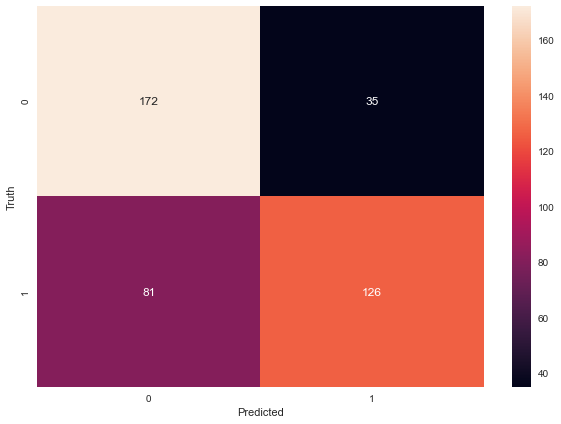

In [12]:
plot_confusion_matrix(prediction, Y_valid)

In [13]:
print(roc_auc_score(Y_valid, prediction))

0.7198067632850242


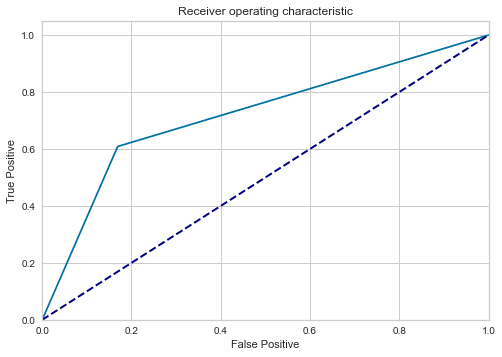

In [14]:
show_roc_curve(prediction, Y_valid)

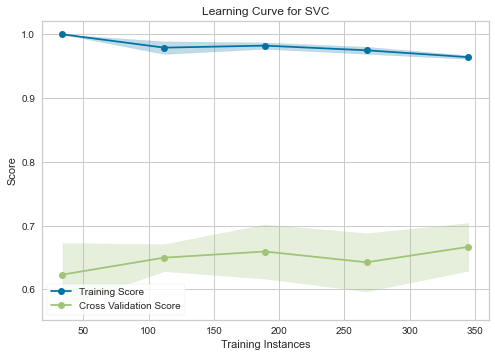

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [15]:
print(learning_curve(model, X_valid, Y_valid, cv=6, scoring='accuracy'))

# Get Test Images And Pre-Processing Them

In [15]:
X_test, Y_test = get_images('Images/test/')

Processing Images...
5 / 10 Loading cat.234.jpg ...
10 / 10 Loading cat.239.jpg ...
5 / 5 Loading rabbit_test.jpeg ...
Images Done!


In [16]:
# Prediction
prediction = model.predict(X_test)
accuracy = model.score(X_test, Y_test)
print('Accuracy: ', accuracy)

Accuracy:  0.8666666666666667


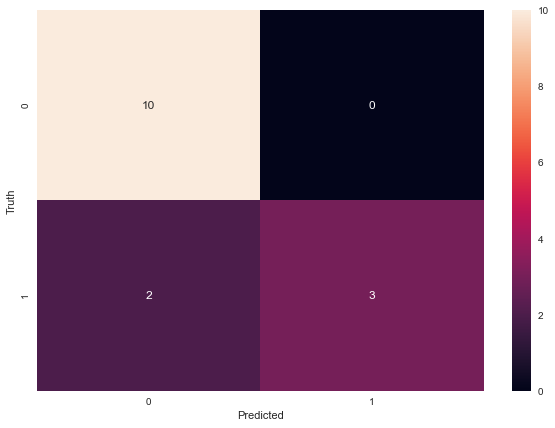

In [17]:
plot_confusion_matrix(prediction, Y_test)

In [18]:
print(roc_auc_score(Y_test, prediction))

0.8


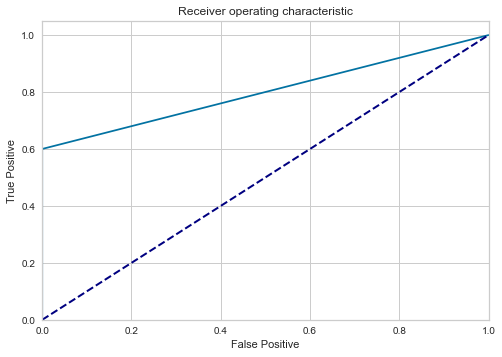

In [19]:
show_roc_curve(prediction, Y_test)

C:\Users\blood\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\blood\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\blood\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\blood\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\blood\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 558, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.

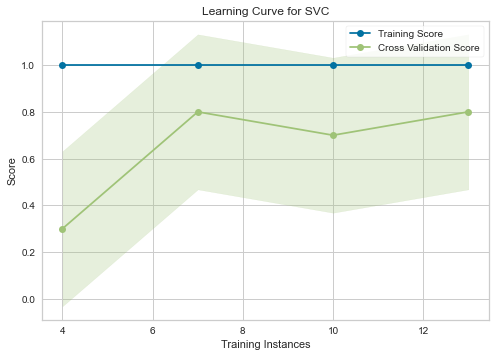

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [25]:
print(learning_curve(model, X_test, Y_test, cv=6, scoring='accuracy'))